In [1]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train_transaction.csv')
print(data.head())

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN  

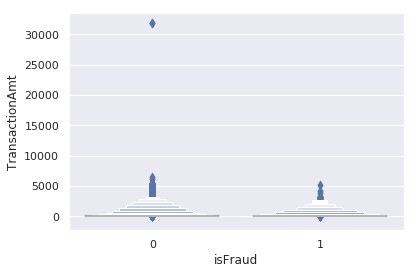

In [3]:
#Lets visualize the data
frauds = data[data["isFraud"] == 1]
non_frauds = data[data["isFraud"] == 0]

import seaborn as sns
sns.set(style="darkgrid")

sns.boxenplot(x="isFraud", y="TransactionAmt",
              color="b", order=[0, 1],
              scale="linear", data=data)


plt.show()

In [4]:
#Lets do some logistic regression!
#Let's clean the data
#data = data.loc[data["TransactionAmt"] < 5000]

In [5]:
#First lets pull out the columns of features we really want (My system can't handle all the features so will have to use less)
features = ['TransactionAmt'] + ['V%d' % number for number in range(1, 340)]
target = ["isFraud"]
print(features)
print(target)

['TransactionAmt', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', '

In [6]:
#Lets create the variables used for training
#Lets also fill the n/a values with mean
X = data[features]
X = X.fillna(X.median())
print(X.head())
y = data[target]

   TransactionAmt   V1   V2   V3   V4   V5   V6   V7   V8   V9  ...  V330  \
0            68.5  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   0.0   
1            29.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   0.0   
2            59.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   0.0   
3            50.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   0.0   
4            50.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   0.0   

   V331  V332  V333  V334  V335  V336  V337  V338  V339  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 340 columns]


In [7]:
#Lets create a normalization method
def normalize(X):
    """
    Make the distribution of the values of each variable similar by subtracting the mean and by dividing by the standard deviation.
    """
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X

In [8]:
# Define the model
model = LogisticRegression(C=1e5)

In [9]:
from sklearn.model_selection import train_test_split

#seperate training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [10]:
#Train model
model.fit(X_train, y_train)

/home/toni/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/toni/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/toni/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
#Show Score
print("Score: ", model.score(X_test, y_test))

Score:  0.9651457019967197


/home/toni/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/toni/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


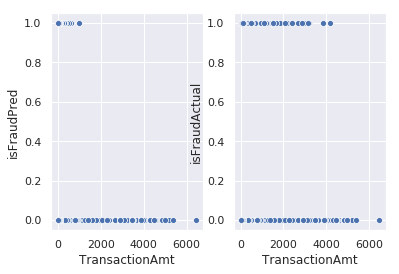

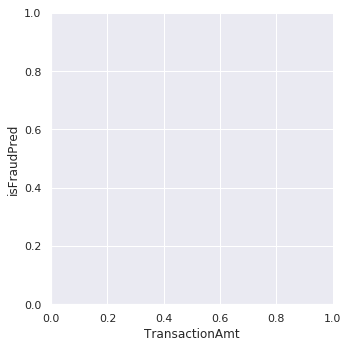

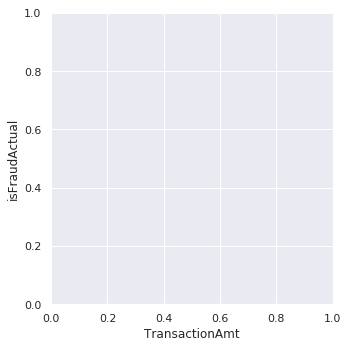

In [12]:
#Above looks a bit like overfitting
#Lets display some predicted values alongside actual values
y_preds = model.predict(X_test)
X_test["isFraudPred"] = np.array(y_preds)
X_test["isFraudActual"] = y_test

f, axes = plt.subplots(1,2)
sns.relplot(x="TransactionAmt", y="isFraudPred", data=X_test, ax=axes[0]);
sns.relplot(x="TransactionAmt", y="isFraudActual", data=X_test, ax=axes[1]);

In [13]:
#It seems that the predicted cases of fraud were many fewer than the actual
#So I decided to remove the line where the outliers are removed {data = data.loc[data["TransactionAmt"] < 5000]}